## Module 01: Supervised Learning

### Lesson 02: Linear Regression

> Linear regression is one of the most fundamental algorithms in machine learning. In this lesson, learn how linear regression works!

#### 01. Intro

* Classification - form yes-no
* Regression - how much

#### 02. Quiz: Housing Prices

#### 03. Solution: Housing Prices

You can think of linear regression as a painter who would look at your data and draw the best fitting line through it

#### 04. Fitting a Line Through Data

The idea is that we take a few steps that make us go closer to all the points

#### 05. Moving a Line

* $y = w_{1}x+w_{2}$
    * `slope: w1`
    * `y-intercept: w2`

#### 06. Absolute Trick

* 绝对值技巧
* $y = w_{1}x+w_{2}$ and (p, q)
    * learning rate: $\alpha$
    * $y = (w_{1} \pm p\alpha)x+(w_{2} \pm \alpha)$

#### 07. Square Trick

* 平方技巧
* $y = w_{1}x+w_{2}$ and (p, q)
    * learning rate: $\alpha$
    * $y = (w_{1} + p(q-q^{'})\alpha)x+(w_{2} + (q-q^{'})\alpha)$

#### 08. Quiz: Absolute and Square Trick

#### 09. Gradient Descent

* 梯度下降(GD)
* $y = w_{1}x+w_{2}$ and (p, q)
    * learning rate: $\alpha$
    * $w_{i} \rightarrow w_{i} - \alpha \frac{\partial}{\partial w_i} Error$

#### 10. Mean Absolute Error

* 平均绝对值误差(MAE)
* $y = w_{1}x+w_{2}$, (x, y) and (x, $\hat y$)
    * $\hat y = w_{1}x + w_2$
    * $\displaystyle Error = \frac{1}{m} \sum_{i=1}^m|y-\hat y|$


#### 11. Mean Squared Error

* 均方误差(MSE)
* $y = w_{1}x+w_{2}$, (x, y) and (x, $\hat y$)
    * $\hat y = w_{1}x + w_2$
    * $\displaystyle Error = \frac{1}{2m} \sum_{i=1}^m(y-\hat y)^2$

#### 12. Quiz: Mean Absolute & Squared Errors

#### 13. Minimizing Error Functions

* $y = w_{1}x+w_{2}$, (x, y) and (x, $\hat y$)
    * $\hat y = w_{1}x + w_2$
    * $\displaystyle \frac{\partial}{\partial w_1} Error = \frac{\partial Error}{\partial \hat y} \frac{\partial \hat y}{\partial w_1}$
    * $\displaystyle Error = \frac{1}{2} (y-\hat y)^2$
        * $\displaystyle \frac{\partial}{\partial w_1} Error = -(y-\hat y)x$
        * $\displaystyle \frac{\partial}{\partial w_2} Error = -(y-\hat y)$
    * $\displaystyle Error = |y-\hat y|$
        * $\displaystyle \frac{\partial}{\partial w_1} Error = \pm x$
        * $\displaystyle \frac{\partial}{\partial w_2} Error = \pm 1$

#### 14. Mean vs Total Error

* $y = w_{1}x+w_{2}$, (x, y) and (x, $\hat y$)
    * $\hat y = w_{1}x + w_2$
    * $M = \displaystyle \sum_{i=1}^m \frac{1}{2} (y - \hat y)^2$
    * $T = \displaystyle \sum_{i=1}^m \frac{1}{2m} (y - \hat y)^2$
    * $M = mT$

However, the gradient descent step consists of subtracting the gradient of the error times the learning rate α ($w_{i} \rightarrow w_{i} - \alpha \frac{\partial}{\partial w_i} Error$). Therefore, choosing between the mean squared error and the total squared error really just amounts to picking a different learning rate.

#### 15. Mini-batch Gradient Descent

At this point, it seems that we've seen two ways of doing linear regression.

* **stochastic gradient descent**: By applying the squared (or absolute) trick at every point in our data one by one, and repeating this process many times.
* **batch gradient descent**: By applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times.

The best way to do linear regression, is to split your data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update your weights. This is still called **mini-batch gradient descent**.

#### 16. Quiz: Mini-Batch Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)

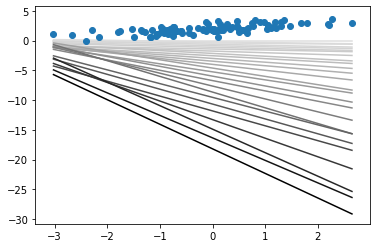

In [2]:
# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.005):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    # Compute errors
    y_pred = np.matmul(X, W) + b
    error = y - y_pred
    
    # Compute stepss
    W_new = W - learn_rate * np.matmul(error, X)
    b_new = b - learn_rate * error.sum()
    
    return W_new, b_new

# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 20, learn_rate = 0.005, num_iter = 25):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef

if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('../../data/batch_data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()

#### 17. Absolute Error vs Squared Error

* The three parallel lines give the same Mean Absolute Error
* The middle of threee paralle line give the smaller Mean Absolute Error

#### 18. Linear Regression in scikit-learn

You'll need to complete each of the following steps:
1. Load the data
    * The data is in the file called "bmi_and_life_expectancy.csv".
    * Use pandas read_csv to load the data into a dataframe (don't forget to import pandas!)
    * Assign the dataframe to the variable bmi_life_data.
2. Build a linear regression model
    * Create a regression model using scikit-learn's LinearRegression and assign it to bmi_life_model.
    * Fit the model to the data.
3. Predict using the model
    * Predict using a BMI of 21.07931 and assign it to the variable laos_life_exp.

In [3]:
# TODO: Add import statements
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
# TODO: Load the data
bmi_life_data = pd.read_csv("../../data/bmi_and_life_expectancy.csv")

# Make and fit the linear regression model
#TODO: Fit the model and Assign it to bmi_life_model
bmi_life_model = LinearRegression()
bmi_life_model.fit(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict([[21.07931]])
laos_life_exp

array([[60.31564716]])

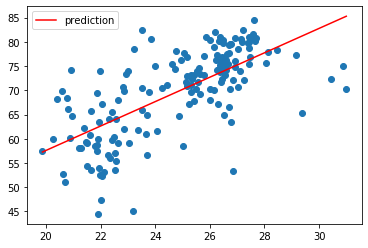

In [4]:
prediction = bmi_life_model.predict(np.sort(bmi_life_data[['BMI']], axis=0))
plt.scatter(bmi_life_data[['BMI']], bmi_life_data[['Life expectancy']])
plt.plot(np.sort(bmi_life_data['BMI'], axis=0), prediction, 'r-', label="prediction")
plt.legend();

#### 19. Higher Dimensions

* n dimensional space: ($x_1, x_2, ..., x_{n-1}$)
* prediction(n-1 dimensional hyperplane): $\hat y = w_{1}x_1 + w_{2}+x_2+...+w_{n-1}x_{n-1}+w_n$

#### 20. Multiple Linear Regression

If you use n predictor variables, then the model can be represented by the equation: $\hat y = w_{1}x_1 + w_{2}+x_2+...+w_{n-1}x_{n-1}+w_n$

You'll need to complete each of the following steps:
1. Build a linear regression model
    * Create a regression model using scikit-learn's LinearRegression and assign it to model.
    * Fit the model to the data.
2. Predict using the model
    * Predict the value of sample_house.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the boston house-prices dataset 
boston_data = load_boston()
x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
# TODO: Fit the model and assign it to the model variable
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)
prediction

array([23.68284712])

#### 21. Closed Form Solution

**2-Dimensional solution**

* Our data will be the values: $x_1, x_2, ..., x_m$
* and our labels will be the values: $y_1, y_2, ..., y_m$
* Let's call our weights$w_1 and w_2$, Therefore, our predictions are $\hat y_i = w_{1}x_i + w_2$
* The mean squared error is $\displaystyle E(w_1, w_2) = \frac{1}{2m} \sum_{i=1}^m(\hat y - y)^2 = \frac{1}{2m} \sum_{i=1}^m(w_{1}x_i + w_2 - y_i)^2$
* We need to minimize this error function. 
* $\displaystyle \frac{\partial E}{\partial w_1} = 0$
* $\displaystyle \frac{\partial E}{\partial w_2} = 0$
* We can use any method to solve 2 equations and 2 variables.

**n-Dimensional solution**

* $E(w) = \frac{1}{m}((XW)^T-y^T)(XW-y)$
* $E(w) = \frac{1}{m}(W^{T}X^{T}XW-(XW)^{T}y-y^{T}(XW)+y^{T}y)$
* $E(w) = \frac{1}{m}(W^{T}X^{T}XW-2(XW)^{T}y+y^{T}y)$
* $\displaystyle \frac{\partial E}{\partial W} = \frac{1}{m}(2X^{T}XW-2X^{T}y)=0$
* Normal Equation(正规方程): $W = (X^{T}X)^{-1}X^{T}y$

As we stated in the video, this method will be expensive in real life, since finding the inverse of the matrix $X^{T}X$ is hard, if n is large. That's why we go through the pain of doing gradient descent many times. But if our data is sparse, namely, if most of the entries of the matrix $X$ are zero, there are some very interesting algorithms which will find this inverse quickly, and that'll make this method useful in real life.

#### 22. (Optional) Closed form Solution Math

#### 23. Linear Regression Warnings

* Linear Regression Works Best When the Data is Linear
* Linear Regression is Sensitive to Outliers

#### 24. Polynomial Regression

We just take the mean absolute or squared error and take the derivative with respect to the four variables and use gradient descent to modify these four weights in order to minimize the error. These algorithm is known as polynomial regression.

#### 25. Quiz: Polynomial Regression

**Perform the following steps below**:
1. Load in the data
    * The data is in the file called 'data.csv'. Note that this data has a header line.
    * Make sure that you've split out the data into the predictor feature in X and outcome feature in y.
    * For X, make sure it is in a 2-d array of 20 rows by 1 column. You might need to use NumPy's reshape function to accomplish this.
2. Create polynomial features
    * Create an instance of sklearn's PolynomialFeatures class and assign it to the variable poly_feat. Pay attention to how to set the degree of features, since that will be how the exercise is evaluated.
    * Create the polynomial features by using the PolynomialFeatures object's .fit_transform() method. The "fit" side of the method considers how many features are needed in the output, and the "transform" side applies those considerations to the data provided to the method as an argument. Assign the new feature matrix to the X_poly variable.
3. Build a polynomial regression model
    * Create a polynomial regression model by combining sklearn's LinearRegression class with the polynomial features. Assign the fit model to poly_model.

In [6]:
# TODO: Add import statements
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = pd.read_csv('../../data/poly_data.csv')
X = train_data['Var_X'].values.reshape(-1, 1)
y = train_data['Var_Y'].values

# Create polynomial features
# TODO: Create a PolynomialFeatures object, then fit and transform the
# predictor feature
poly_feat = PolynomialFeatures(degree=4)
X_poly = poly_feat.fit_transform(X)

# Make and fit the polynomial regression model
# TODO: Create a LinearRegression object and fit it to the polynomial predictor
# features
poly_model = LinearRegression(fit_intercept = False).fit(X_poly, y)

# Once you've completed all of the steps, select Test Run to see your model
# predictions against the data, or select Submit Answer to check if the degree
# of the polynomial features is the same as ours!
prediction = poly_model.predict(np.sort(X_poly, axis=0))
prediction

array([  8.8785302 ,  10.7580315 ,   9.75038811,   8.92757844,
         6.9768612 ,   4.76407384,   4.15648019,   1.98240061,
        -0.36181139,  -1.43130223,  -2.91415446,  -4.15087169,
        -6.67228084,  -7.45527022,  -9.73361543, -10.97544305,
        -8.918469  ,  -6.55748759,  -5.7001477 ,   4.37232952])

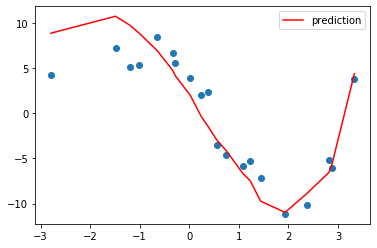

In [7]:
plt.scatter(X, y)
plt.plot(np.sort(X, axis=0), prediction, 'r', label="prediction")
plt.legend();

#### 26. Regularization

**Overfitting**

overfitting means that the model performs well on the training data, but it does not generalize well. Overfitting happens when the model is too complex relative to the amount and noisiness of the training data. The possible solutions are:

* To simplify the model by selecting one with fewer parameters (e.g., a linear model rather than a high-degree polynomial model), by reducing the number of attributes in the training data or by constraining the model
* To gather more training data
* To reduce the noise in the training data (e.g., fix data errors and remove outliers)

The amount of regularization to apply during learning can be controlled by a `hyperparameter`. A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training. 

The fitting procedure involves a loss function, known as residual sum of squares or RSS. The coefficients are chosen, such that they minimize this loss function. `λ` is the tuning parameter that decides how much we want to penalize the flexibility of our model.

$\displaystyle RSS=\sum_{i=1}^m(w^{T}x_i - y_i)^2+\lambda ||W||_{*}$

Regularization helps prevent linear models from overfitting training data examples (that is, memorizing patterns instead of generalizing them) by penalizing extreme weight values. `L1 regularization` has the effect of reducing the number of features used in the model by pushing to zero the weights of features that would otherwise have small weights. As a result, L1 regularization results in sparse models and reduces the amount of noise in the model. `L2 regularization` results in smaller overall weight values, and stabilizes the weights when there is high correlation between the input features. 

|L1 Regularization|L2 Regularization|
| --- | --- |
|Computationally Inefficient(unless data is sparse)|Computationally Efficient|
|Sparse Outputs|Non-Sparse Outputs|
|Feature Selection|No Feature Selection|

Regularization will remove features from a model (by setting their coefficients to zero) if the penalty for removing them is small.

#### 27. Quiz: Regularization

Use sklearn's `Lasso` class to fit a linear regression model to the data, while also using L1 regularization to control for model complexity.

Perform the following steps:
1. Load in the data
    * The data is in the file called 'data.csv'. Note that there's no header row on this file.
    * Split the data so that the six predictor features (first six columns) are stored in X, and the outcome feature (last column) is stored in y.
2. Fit data using linear regression with Lasso regularization
    * Create an instance of sklearn's Lasso class and assign it to the variable lasso_reg. You don't need to set any parameter values: use the default values for the quiz.
    * Use the Lasso object's .fit() method to fit the regression model onto the data.
3. Inspect the coefficients of the regression model
    * Obtain the coefficients of the fit regression model using the .coef_ attribute of the Lasso object. Store this in the reg_coef variable: the coefficients will be printed out, and you will use your observations to answer the question at the bottom of the page.

In [8]:
# TODO: Add import statements
from sklearn.linear_model import Lasso

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = np.loadtxt('../../data/lasso_data.csv', delimiter=',')
X = train_data[:,:-1]
y = train_data[:, -1]

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[ 0.          2.35793224  2.00441646 -0.05511954 -3.92808318  0.        ]


#### 28. Feature Scaling

Feature scaling(特征缩放) is a way of transforming your data into a common range of values. There are two common scalings:

* **Standardizing**
    * Standardizing is completed by taking each value of your column, subtracting the mean of the column, and then dividing by the standard deviation of the column.
    * In Python, let's say you have a column in df called height. You could create a standardized height as: `df["height_standard"] = (df["height"] - df["height"].mean()) / df["height"].std()`
* **Normalizing**
    * With normalizing, data are scaled between 0 and 1. 
    * `df["height_normal"] = (df["height"] - df["height"].min() / (df["height"].max() - df['height'].min())`

In many machine learning algorithms, the result will change depending on the units of your data. This is especially true in two specific cases:
* When your algorithm(SVMs, KNN) uses a distance based metric to predict.
* When you incorporate regularization.

Perform the following steps:
1. Load in the data
    * The data is in the file called 'data.csv'. Note that there's no header row on this file.
    * Split the data so that the six predictor features (first six columns) are stored in X, and the outcome feature (last column) is stored in y.
2. (NEW) Perform feature scaling on data via standardization
    * Create an instance of sklearn's StandardScaler and assign it to the variable scaler.
    * Compute the scaling parameters by using the .fit_transform() method on the predictor feature array, which also returns the predictor variables in their standardized values. Store those standardized values in X_scaled.
3. Fit data using linear regression with Lasso regularization
    * Create an instance of sklearn's Lasso class and assign it to the variable lasso_reg. You don't need to set any parameter values: use the default values for the quiz.
    * Use the Lasso object's .fit() method to fit the regression model onto the data. Make sure that you apply the fit to the standardized data from the previous step (X_scaled), not the original data.
4. Inspect the coefficients of the regression model
    * Obtain the coefficients of the fit regression model using the .coef_ attribute of the Lasso object. Store this in the reg_coef variable: the coefficients will be printed out, and you will use your observations to answer the question at the bottom of the page.

In [9]:
# TODO: Add import statements
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Assign the data to predictor and outcome variables
# TODO: Load the data
train_data = np.loadtxt('../../data/lasso_data.csv', delimiter=',')
X = train_data[:, :-1]
y = train_data[:, -1]

# TODO: Create the standardization scaling object.
scaler = StandardScaler()

# TODO: Fit the standardization parameters and scale the data.
X_scaled = scaler.fit_transform(X)

# TODO: Create the linear regression model with lasso regularization.
lasso_reg = Lasso()

# TODO: Fit the model.
lasso_reg.fit(X_scaled, y)

# TODO: Retrieve and print out the coefficients from the regression model.
reg_coef = lasso_reg.coef_
print(reg_coef)

[  0.           3.90753617   9.02575748  -0.         -11.78303187
   0.45340137]


#### 29. Outro

**Recap**

In this lesson, you were introduced to linear models. Specifically, you saw:

* **Gradient descent** as a method to optimize your linear models.
* **Multiple Linear Regression** as a technique for when you are comparing more than two variables.
* **Polynomial Regression** for relationships between variables that aren't linear.
* **Regularization** as a technique to assure that your models will not only fit to the data available, but also extend to new situations.

**Outro**

In this lesson, you were predicting quantitative values. Predicting quantitative values is often just considered a Regression problem. In the next lesson, you will be introduced to predicting a category, which is called a Classification problem.